In [1]:
import pandas

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 'font.family':'FreeSans', 'xtick.labelsize':20, 'ytick.labelsize':20, 'figure.figsize':(12, 8)})

In [2]:
previous_file = '/home/adrian/projects/vigur/results/sequencing/intersect_previous/supplemetary_information_table_SIT2.DETs.csv'
current_file = '/home/adrian/projects/vigur/results/sequencing/intersect_previous/run_72_treatment_mix_time_four_up.tsv'

In [3]:
previous = pandas.read_csv(previous_file, sep=',', index_col=0)
print(previous.shape)
previous.head()

(71, 10)


,Gene name,Biotype,Description,Base mean,log2FC,P value,Adjusted P-value,Reference expression (TPM),Sample expression (TPM),Discrete abs(log2FC)
ENSEMBL,,,,,,,,,,
ENSG00000258504,RP11-638I2.6,lincRNA,NaN,26.0145,8.0825,0.000007,0.00338,0.0,2.4715,1.5850
ENSG00000228294,BMS1P17,transcribed_unprocessed_pseudogene,BMS1 pseudogene 17,24.3383,7.8918,0.000103,0.03560,0.0,6.0061,2.8074
ENSG00000252948,RNU6-1314P,snRNA,NaN,16.6484,7.3430,0.000323,0.09160,0.0,3.6135,2.3219
ENSG00000259109,RP4-687K1.2,processed_pseudogene,NaN,16.2737,7.3119,0.000347,0.09730,0.0,3.5709,2.3219
ENSG00000273077,RP11-130C6.1,lincRNA,NaN,28.7883,7.2419,0.000029,0.01210,0.0,5.1682,2.5850


In [4]:
current = pandas.read_csv(current_file, sep='\t', index_col=0)
print(current.shape)
current.head()

(64, 9)


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_biotype,description,hgnc_symbol
common,,,,,,,,,
ENSG00000006128,18.618372,7.743246,0.947880,7.114029,1.127033e-12,1.609403e-09,protein_coding,tachykinin precursor 1 [Source:HGNC Symbol;Acc...,TAC1
ENSG00000274194,7.039330,6.343128,1.078696,4.953319,7.295814e-07,4.762707e-04,protein_coding,membrane bound O-acyltransferase domain contai...,NaN
ENSG00000277025,7.039330,6.343128,1.078696,4.953319,7.295814e-07,4.762707e-04,protein_coding,membrane bound O-acyltransferase domain contai...,NaN
ENSG00000277733,7.039330,6.343128,1.078696,4.953319,7.295814e-07,4.762707e-04,protein_coding,membrane bound O-acyltransferase domain contai...,NaN
ENSG00000277923,7.039330,6.343128,1.078696,4.953319,7.295814e-07,4.762707e-04,protein_coding,membrane bound O-acyltransferase domain contai...,NaN


In [5]:
intersect = previous.index.intersection(current.index)
print(intersect.shape)

(18,)


ENSG00000023171 GRAMD1B GRAM domain containing 1B
ENSG00000109321 AREG amphiregulin
ENSG00000211448 DIO2 iodothyronine deiodinase 2
ENSG00000198400 NTRK1 neurotrophic receptor tyrosine kinase 1
ENSG00000172572 PDE3A phosphodiesterase 3A
ENSG00000027869 SH2D2A SH2 domain containing 2A
ENSG00000153234 NR4A2 nuclear receptor subfamily 4 group A member 2
ENSG00000119508 NR4A3 nuclear receptor subfamily 4 group A member 3
ENSG00000178726 THBD thrombomodulin
ENSG00000159167 STC1 stanniocalcin 1
ENSG00000156427 FGF18 fibroblast growth factor 18
ENSG00000095752 IL11 interleukin 11
ENSG00000187479 C11orf96 chromosome 11 open reading frame 96
ENSG00000141404 GNAL G protein subunit alpha L
ENSG00000108551 RASD1 ras related dexamethasone induced 1
ENSG00000255112 CHMP1B charged multivesicular body protein 1B
ENSG00000174343 CHRNA9 cholinergic receptor nicotinic alpha 9 subunit
ENSG00000095637 SORBS1 sorbin and SH3 domain containing 1


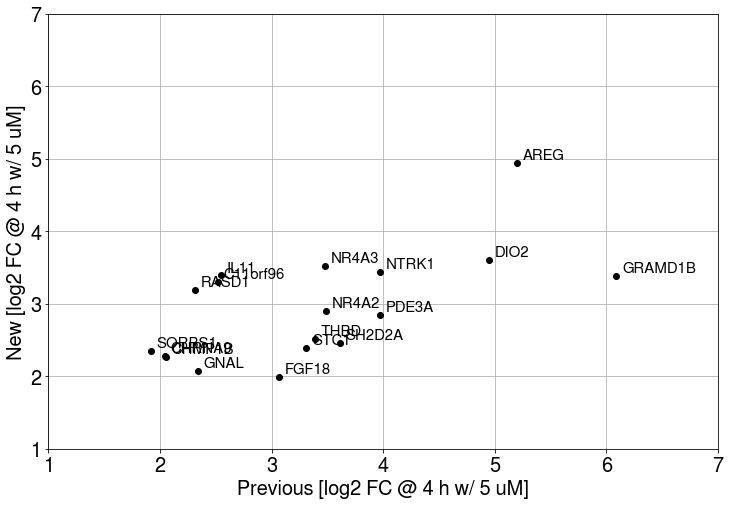

In [8]:
for element in intersect:
    
    gene_name = previous.loc[element, 'Gene name']
    gene_description = previous.loc[element, 'Description']
    print(element, gene_name, gene_description)
    
    x = previous.loc[element, 'log2FC']
    y = current.loc[element, 'log2FoldChange']
    
    matplotlib.pyplot.plot(x, y, 'o', color='black')
    matplotlib.pyplot.text(x+0.05, y+0.05, gene_name, fontsize=15)

matplotlib.pyplot.xlabel('Previous [log2 FC @ 4 h w/ 5 uM]')
matplotlib.pyplot.ylabel('New [log2 FC @ 4 h w/ 5 uM]')
matplotlib.pyplot.xlim(1, 7)
matplotlib.pyplot.ylim(1, 7)
matplotlib.pyplot.grid(':')

In [10]:
# only before
for element in previous.index:
    if element not in intersect:
        gene_name = previous.loc[element, 'Gene name']
        gene_description = previous.loc[element, 'Description']
        print(element, gene_name, gene_description)

ENSG00000258504 RP11-638I2.6 nan
ENSG00000228294 BMS1P17 BMS1 pseudogene 17
ENSG00000252948 RNU6-1314P nan
ENSG00000259109 RP4-687K1.2 nan
ENSG00000273077 RP11-130C6.1 nan
ENSG00000004799 PDK4 pyruvate dehydrogenase kinase 4
ENSG00000135346 CGA glycoprotein hormones, alpha polypeptide
ENSG00000153802 TMPRSS11D transmembrane serine protease 11D
ENSG00000121966 CXCR4 C-X-C motif chemokine receptor 4
ENSG00000259423 RP11-265N7.2 nan
ENSG00000081985 IL12RB2 interleukin 12 receptor subunit beta 2
ENSG00000109193 SULT1E1 sulfotransferase family 1E member 1
ENSG00000237649 KIFC1 kinesin family member C1
ENSG00000272841 RP3-428L16.2 nan
ENSG00000226935 LINC00161 long intergenic non-protein coding RNA 161
ENSG00000120875 DUSP4 dual specificity phosphatase 4
ENSG00000168453 HR HR lysine demethylase and nuclear receptor corepressor
ENSG00000116761 CTH cystathionine gamma-lyase
ENSG00000181634 TNFSF15 TNF superfamily member 15
ENSG00000259276 RP11-815J21.3 nan
ENSG00000123977 DAW1 dynein assembly 

In [11]:
# only now
for element in current.index:
    if element not in intersect:
        gene_name = current.loc[element, 'hgnc_symbol']
        gene_description = current.loc[element, 'description']
        print(element, gene_name, gene_description)

ENSG00000006128 TAC1 tachykinin precursor 1 [Source:HGNC Symbol;Acc:HGNC:11517]
ENSG00000274194 nan membrane bound O-acyltransferase domain containing 7 [Source:NCBI gene;Acc:79143]
ENSG00000277025 nan membrane bound O-acyltransferase domain containing 7 [Source:NCBI gene;Acc:79143]
ENSG00000277733 nan membrane bound O-acyltransferase domain containing 7 [Source:NCBI gene;Acc:79143]
ENSG00000277923 nan membrane bound O-acyltransferase domain containing 7 [Source:NCBI gene;Acc:79143]
ENSG00000278322 nan membrane bound O-acyltransferase domain containing 7 [Source:NCBI gene;Acc:79143]
ENSG00000278519 nan membrane bound O-acyltransferase domain containing 7 [Source:NCBI gene;Acc:79143]
ENSG00000270672 MTRNR2L6 MT-RNR2 like 6 [Source:HGNC Symbol;Acc:HGNC:37163]
ENSG00000171551 ECEL1 endothelin converting enzyme like 1 [Source:HGNC Symbol;Acc:HGNC:3147]
ENSG00000181195 PENK proenkephalin [Source:HGNC Symbol;Acc:HGNC:8831]
ENSG00000128713 HOXD11 homeobox D11 [Source:HGNC Symbol;Acc:HGNC:5134